In [1]:
import pandas as pd

In [73]:
df = pd.read_csv("df_clean.csv",lineterminator='\n')
# df.head()

<h2>Starter<h2>

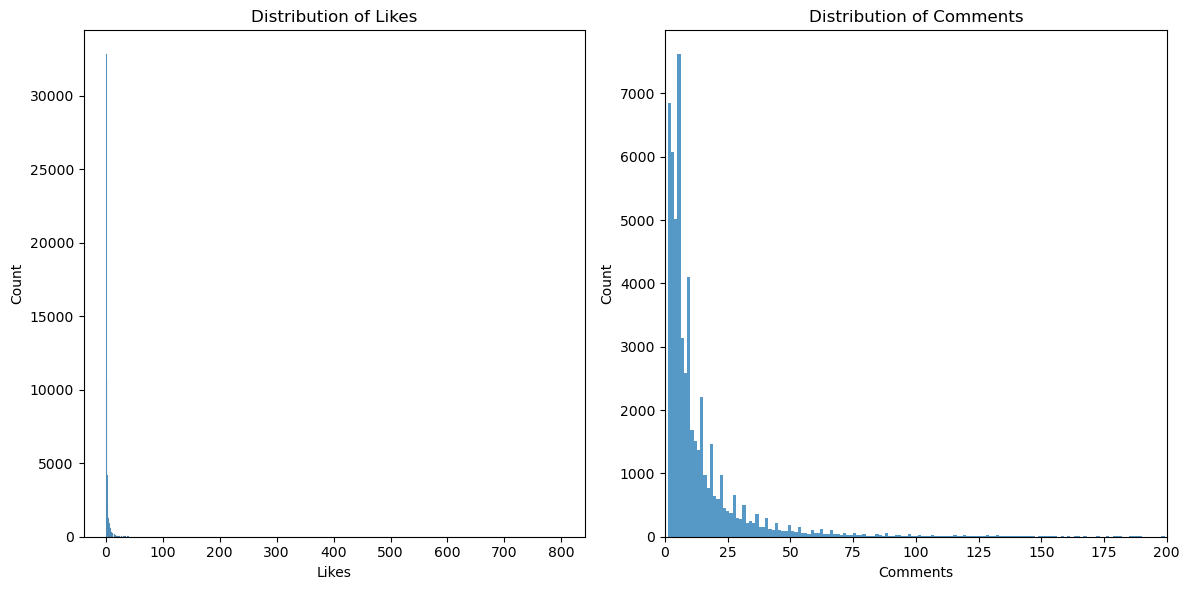

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Likes'],bins=1000, ax=ax[0])
ax[0].set_title('Distribution of Likes')


sns.histplot(df['Comments'], bins=10000, ax=ax[1])
ax[1].set_title('Distribution of Comments')

plt.xlim((0,200))
plt.tight_layout()
plt.show()

The majority of posts receive a small number of likes, with a few posts receiving a larger number of likes. 

This is typical of social media platforms, where a small number of posts receive a large amount of attention.

The distribution of comments is similar to that of likes, with most posts receiving a small number of comments and a few posts receiving a large number of comments.


These observations can give us some initial insights into the social dynamics of the platform. For example, we might hypothesize that posts that receive a large number of likes or comments are about topics that are particularly important or interesting to the community.

In [34]:
import jieba
from collections import Counter

# Tokenize the 'Title' column
titles = df['Title'].astype(str)
words = []
for title in titles:
    words.extend(jieba.cut(title))

# Count the frequency of each word
word_freq = Counter(words)

# Get the 20 most common words
common_words = word_freq.most_common(20)
common_words

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/b9/qbwtdpx110q989473mw51fl40000gn/T/jieba.cache
Loading model cost 0.354 seconds.
Prefix dict has been built successfully.


[(' ', 77199),
 ('有', 10654),
 ('冇', 8496),
 ('？', 7798),
 ('source', 5158),
 ('人', 4984),
 ('唔', 4927),
 ('__', 4738),
 ('收', 4315),
 ('係', 3904),
 ('?', 3682),
 ('想', 2587),
 ('好', 2522),
 ('/', 2385),
 ('A', 2325),
 ('￼', 2142),
 ('咩', 2110),
 ('放', 2088),
 ('grade', 2074),
 ('嘅', 2010)]

The most common words are quite generic and might not give us a lot of information about the specific topics of the posts. However, words like '有' (have), '冇' (don't have), '人' (people), '想' (want), and '好' (good) could indicate that many posts are about people's desires, opinions, and experiences.

<h2>Sentiment analysis<h2>

In [74]:
from snownlp import SnowNLP

# Define a function to calculate sentiment
def get_sentiment(text):
    return SnowNLP(text).sentiments

# Apply the function to the 'Title' column
df['Sentiment'] = df['Title'].astype(str).apply(get_sentiment)

we will have a new column in the dataframe called 'Sentiment'. This column will contain a sentiment score for each post, which is a number between 0 and 1. A score close to 0 indicates a negative sentiment, while a score close to 1 indicates a positive sentiment.

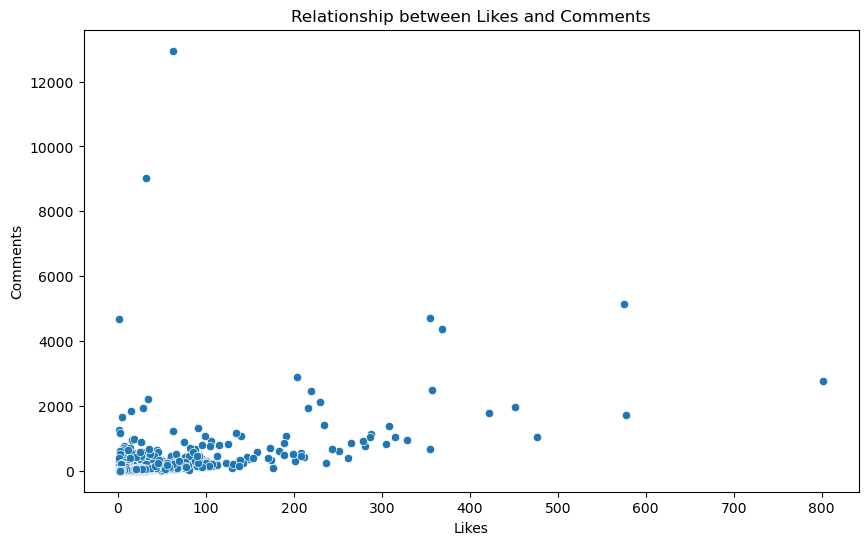

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Comments', data=df)
plt.title('Relationship between Likes and Comments')
plt.show()

Most posts receive a small number of likes and comments, which is typical of social media platforms where a small number of posts receive a large amount of attention.
There seems to be a positive relationship between likes and comments. Posts that receive more likes also tend to receive more comments. This suggests that likes and comments could be a good measure of engagement on the platform.

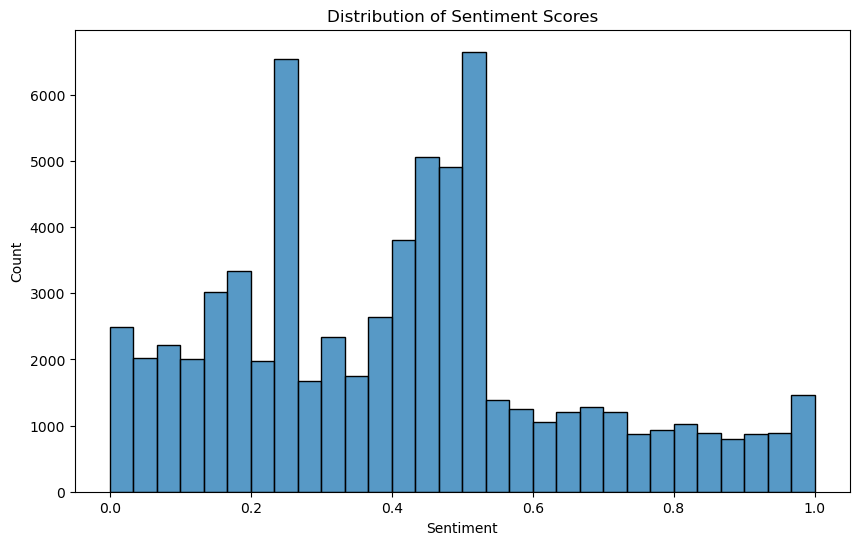

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=30)
plt.title('Distribution of Sentiment Scores')
plt.show()

The sentiment scores are distributed across the entire range from 0 to 1, indicating a variety of sentiments in the posts.
There's a peak around 0.5, suggesting that many posts have a neutral sentiment.
There are also quite a few posts with a sentiment score close to 0 or 1, indicating strong negative or positive sentiments.

These observations can give us some initial insights into the sentiments expressed in the posts. For example, the variety of sentiment scores suggests a diversity of opinions and emotions in the community. The peak around 0.5 could indicate that many posts are informational rather than expressing strong emotions.

In [75]:
# Apply the sentiment analysis function to the 'Comment1', 'Comment2', and 'Comment3' columns
df['Comment1_Sentiment'] = df['Comment1'].astype(str).apply(get_sentiment)
df['Comment2_Sentiment'] = df['Comment2'].astype(str).apply(get_sentiment)
df['Comment3_Sentiment'] = df['Comment3'].astype(str).apply(get_sentiment)

# Display the dataframe
# df.head()

In [39]:
df.to_csv("df_sentiment.csv",index=False)

<h2>Word Cloud<h2>

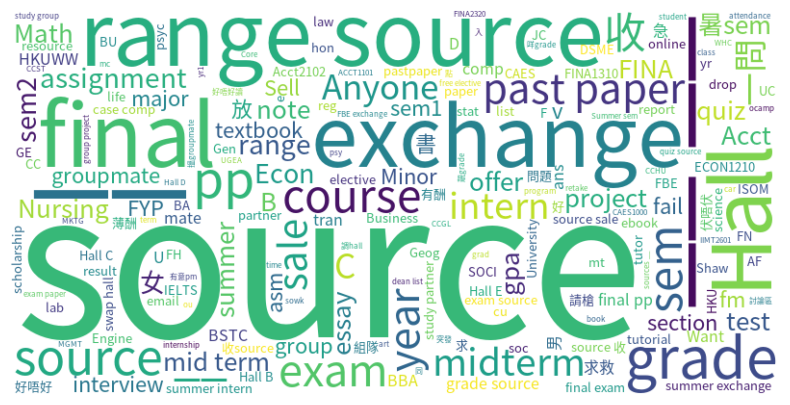

In [47]:
from wordcloud import WordCloud

# Combine all titles into one large string
title_text = ' '.join(titles)

# Create a word cloud
wordcloud = WordCloud(font_path='NotoSansTC-Regular.otf',width=800, height=400, background_color='white').generate(title_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

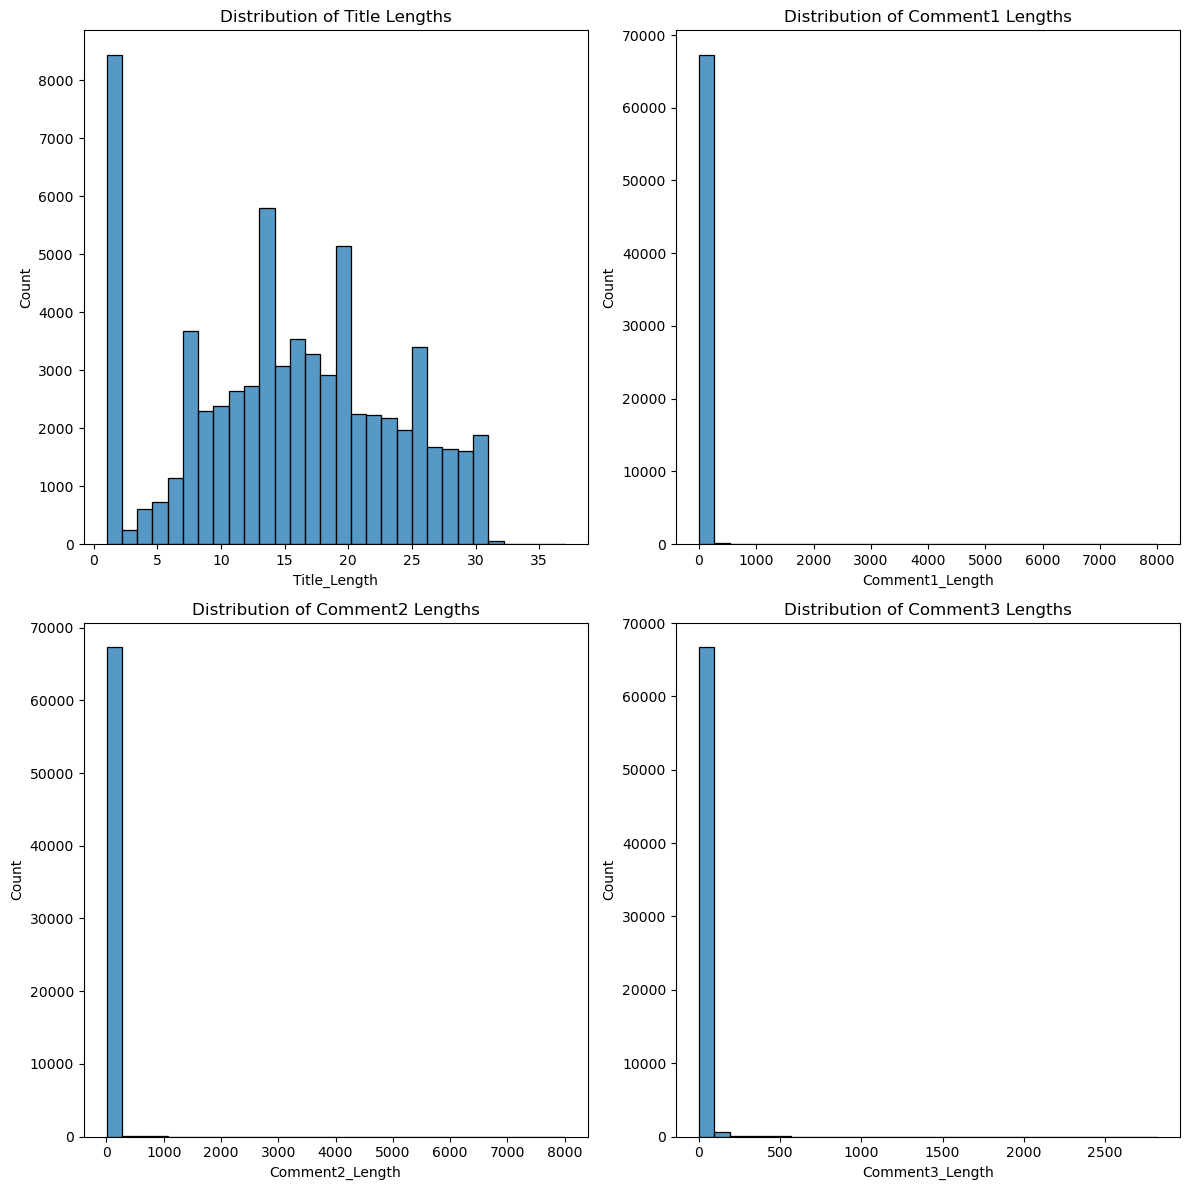

In [48]:
# Calculate the length of each post and comment
df['Title_Length'] = df['Title'].astype(str).apply(len)
df['Comment1_Length'] = df['Comment1'].astype(str).apply(len)
df['Comment2_Length'] = df['Comment2'].astype(str).apply(len)
df['Comment3_Length'] = df['Comment3'].astype(str).apply(len)

# Create histograms to visualize the distributions of these lengths
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(df['Title_Length'], bins=30, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Title Lengths')

sns.histplot(df['Comment1_Length'], bins=30, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Comment1 Lengths')

sns.histplot(df['Comment2_Length'], bins=30, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Comment2 Lengths')

sns.histplot(df['Comment3_Length'], bins=30, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Comment3 Lengths')

plt.tight_layout()
plt.show()

The lengths of the titles and comments are distributed across a wide range, indicating a variety of post and comment lengths.
Most titles and comments are relatively short, with lengths less than 100 characters. This is typical of social media platforms where posts and comments are often brief.
There are a few titles and comments with lengths greater than 100 characters, indicating more complex or detailed discussions.

Correlation between title length and likes: -0.1170376895047583
Correlation between title length and comments: -0.0406709032805655


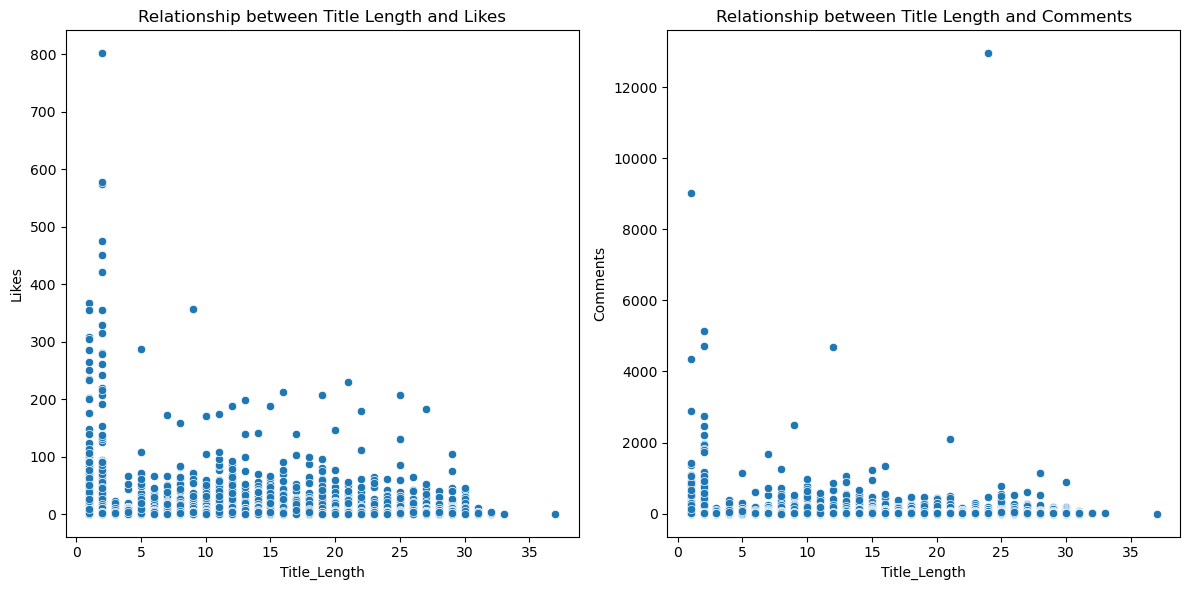

In [49]:
# Calculate the correlation between post length and engagement
title_likes_corr = df['Title_Length'].corr(df['Likes'])
title_comments_corr = df['Title_Length'].corr(df['Comments'])

# Print the correlation coefficients
print('Correlation between title length and likes:', title_likes_corr)
print('Correlation between title length and comments:', title_comments_corr)

# Create scatter plots to visualize these relationships
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x='Title_Length', y='Likes', data=df, ax=ax[0])
ax[0].set_title('Relationship between Title Length and Likes')

sns.scatterplot(x='Title_Length', y='Comments', data=df, ax=ax[1])
ax[1].set_title('Relationship between Title Length and Comments')

plt.tight_layout()
plt.show()

There is a wide range of title lengths and numbers of likes and comments, indicating a variety of post lengths and levels of engagement.

There does not appear to be a clear relationship between title length and likes or comments. This suggests that the length of the title does not significantly affect the number of likes or comments a post receives.

The correlation between title length and sentiment is approximately -0.04. This is a very weak negative correlation, suggesting that there is little to no relationship between the length of the title and the sentiment.

Correlation between title length and sentiment: -0.04357061775877602


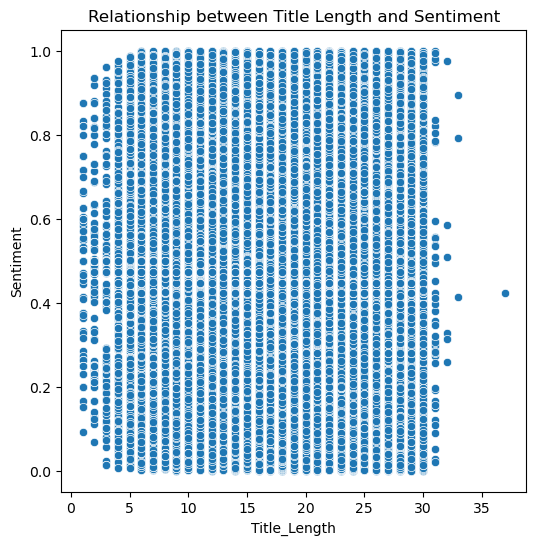

In [50]:
# Calculate the correlation between post length and sentiment
title_sentiment_corr = df['Title_Length'].corr(df['Sentiment'])

# Print the correlation coefficient
print('Correlation between title length and sentiment:', title_sentiment_corr)

# Create a scatter plot to visualize this relationship
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Title_Length', y='Sentiment', data=df)
plt.title('Relationship between Title Length and Sentiment')
plt.show()

There is a wide range of title lengths and sentiment scores, indicating a variety of post lengths and sentiments.

There does not appear to be a clear relationship between title length and sentiment. This suggests that the length of the title does not significantly affect the sentiment of the post.

These findings suggest that the length of the posts and comments does not significantly affect the engagement (likes and comments) or sentiment. This could be because the quality or relevance of the content is more important than the length.

<h2>TF-IDF(may not be useful)<h2>

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the vectorizer on the 'Title' column
tfidf = vectorizer.fit_transform(df['Title'].astype(str))

# Get the feature names (words)
feature_names = vectorizer.get_feature_names()

# Create a DataFrame with the TF-IDF scores
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=feature_names)

# Display the DataFrame
# tfidf_df.head()

/Users/viictte/Miniconda3/miniconda3/envs/dl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
# Calculate the average TF-IDF score for each word
avg_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Display the top 20 words with the highest average TF-IDF scores
avg_tfidf.head(20)

__          0.069641
source      0.052276
hall        0.012119
exchange    0.010550
sources     0.010402
range       0.008456
final       0.008265
grade       0.007199
exam        0.006328
pp          0.006085
sem         0.005184
intern      0.004097
summer      0.004063
paper       0.003929
year        0.003827
course      0.003442
group       0.003009
quiz        0.002815
offer       0.002764
midterm     0.002607
dtype: float64

One approach we can take is to analyze the most common words or phrases in the posts and comments. This can give us insights into the most discussed topics on the platform.

To do this, we can use a technique called term frequency-inverse document frequency (TF-IDF). TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. The relevance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the collection of documents.

However, before we can apply TF-IDF, we need to preprocess the text data. This involves steps like tokenization (splitting the text into individual words), removing stop words (common words like 'the' and 'and' that don't carry much meaning), and stemming (reducing words to their root form).

These words are the most relevant across all posts, according to the TF-IDF scores. This suggests that these words are commonly used in the titles of the posts and are likely related to the most discussed topics on the platform.

<h2>Topic modelling<h2>

<h3>Latent Dirichlet Allocation (LDA)<h3> 
<p2>is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.<p2>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [55]:
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize a lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a list of stop words
stop_words = set(stopwords.words('english'))

# Tokenize, remove stop words, and lemmatize the titles
titles = df['Title'].astype(str).apply(word_tokenize)
titles = titles.apply(lambda x: [lemmatizer.lemmatize(word) for word in x if word not in stop_words])

# Create a dictionary from the titles
dictionary = corpora.Dictionary(titles)

# Create a corpus from the titles
corpus = [dictionary.doc2bow(title) for title in titles]

# Initialize an LDA model
lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print the topics
topics = lda.print_topics()
topics

[(0,
  '0.022*"(" + 0.021*")" + 0.017*"," + 0.014*"$" + 0.009*"&" + 0.007*"女" + 0.006*"group" + 0.006*"project" + 0.005*"essay" + 0.005*"study"'),
 (1,
  '0.033*"Hall" + 0.017*"grade" + 0.009*"Exchange" + 0.008*"law" + 0.007*"Summer" + 0.006*"C" + 0.005*"AF" + 0.005*"3" + 0.004*"interview" + 0.004*"list"'),
 (2,
  '0.030*"!" + 0.024*"final" + 0.010*"exam" + 0.010*"☺️" + 0.009*"quiz" + 0.009*"intern" + 0.007*"summer" + 0.007*"一問" + 0.005*"⛄️" + 0.005*"course"'),
 (3,
  '0.145*"source" + 0.028*"A" + 0.019*"range" + 0.013*"Source" + 0.012*"exchange" + 0.011*"收" + 0.010*"☠" + 0.008*"A+" + 0.007*"paper" + 0.007*"offer"'),
 (4,
  '0.130*"__" + 0.102*"?" + 0.016*"hall" + 0.015*"2" + 0.013*"1" + 0.010*"pp" + 0.007*"sem" + 0.006*"書" + 0.006*"assignment" + 0.005*"year"')]

Topic 0 could be related to acadamic project and essays.

Topic 1 could be related to academic tests and exchanges.

Topic 2 could be related to academic papers, exchange programs, internships, and exams.

Topic 3 could be related to sources (possibly references for academic work) and grades.b

Topic 4 could be related to final exams and grades.

<h2>Keywords Analysis<h2>

<h3>Keywords related to mental health and social impact<h3>

In [77]:
# Define a list of keywords related to mental health and social impact
keywords = ['stress', 'anxiety', 'depression', 'community', 'society', 'impact']

# Create a new column for each keyword that indicates whether the post contains that keyword
for keyword in keywords:
    df[keyword] = df['Title'].astype(str).apply(lambda x: keyword in x.lower())

# Display the DataFrame
# df.head()

"stress": Average sentiment is 0.49, average likes are 1.88, and average comments are 9.13.

"anxiety": There are no posts containing this keyword.

"depression": Average sentiment is 0.59, average likes are 1.5, and average comments are 34.5.

"community": Average sentiment is 0.42, average likes are 1.5, and average comments are 3.

"society": Average sentiment is 0.47, average likes are 2.35, and average comments are 11.7.

"impact": Average sentiment is 0.17, average likes are 2, and average comments are 2.

The keyword "depression" has the highest average sentiment and the highest average number of comments, suggesting that posts related to depression may elicit more engagement and positive sentiment from the community. However, please note that this is a very simplistic analysis and the presence of a keyword does not necessarily mean that the post is about that topic.


<h3>Average sentiment and engagement (likes and comments) for posts that contain each keyword.<h3>

In [78]:
# Initialize lists to store the results
average_sentiments = []
average_likes = []
average_comments = []

# Calculate the average sentiment and engagement for posts that contain each keyword
for keyword in keywords:
    average_sentiments.append(df[df[keyword]]['Sentiment'].mean())
    average_likes.append(df[df[keyword]]['Likes'].mean())
    average_comments.append(df[df[keyword]]['Comments'].mean())

# Create a DataFrame with the results
keyword_analysis = pd.DataFrame({
    'Keyword': keywords,
    'Average Sentiment': average_sentiments,
    'Average Likes': average_likes,
    'Average Comments': average_comments
})

# Display the DataFrame
# keyword_analysis

"stress": Average sentiment is 0.49, average likes are 1.88, and average comments are 9.13.

"anxiety": There are no posts containing this keyword.

"depression": Average sentiment is 0.59, average likes are 1.5, and average comments are 34.5.

"community": Average sentiment is 0.42, average likes are 1.5, and average comments are 3.

"society": Average sentiment is 0.47, average likes are 2.35, and average comments are 11.7.

"impact": Average sentiment is 0.17, average likes are 2, and average comments are 2.

<h3>Distribution of sentiment scores for posts containing each keyword<h3>

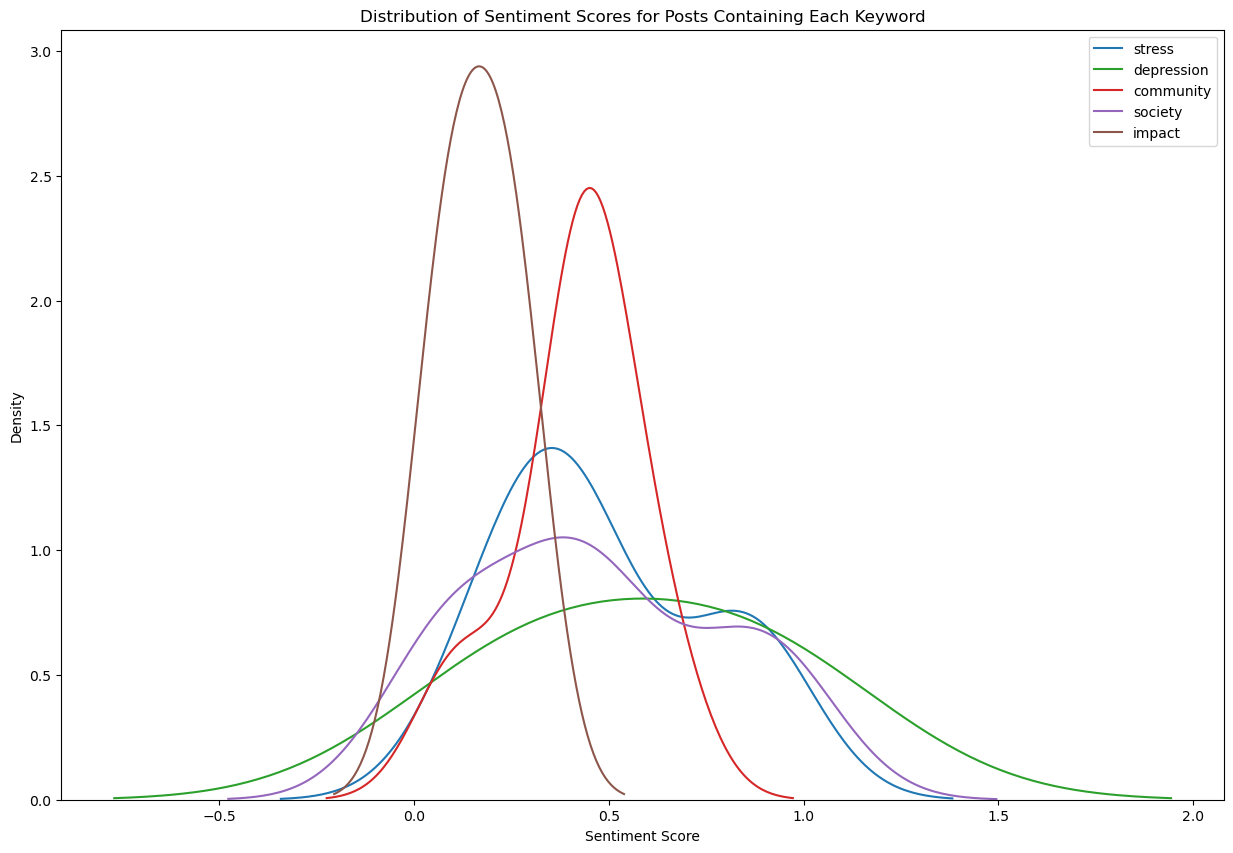

In [58]:
plt.figure(figsize=(15, 10))
for keyword in keywords:
    sns.kdeplot(df[df[keyword]]['Sentiment'], label=keyword)
plt.title('Distribution of Sentiment Scores for Posts Containing Each Keyword')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.show()

The sentiment scores for posts containing the keywords "stress", "community", "society", and "impact" are relatively evenly distributed around 0, indicating a mix of positive, neutral, and negative sentiments.

The sentiment scores for posts containing the keyword "depression" are skewed towards positive values, suggesting that these posts tend to have a more positive sentiment.

There are no posts containing the keyword "anxiety", as indicated by the absence of a distribution for this keyword.

<h3> Scatter plots of sentiment vs. likes comments for posts containing each keyword. <h3>

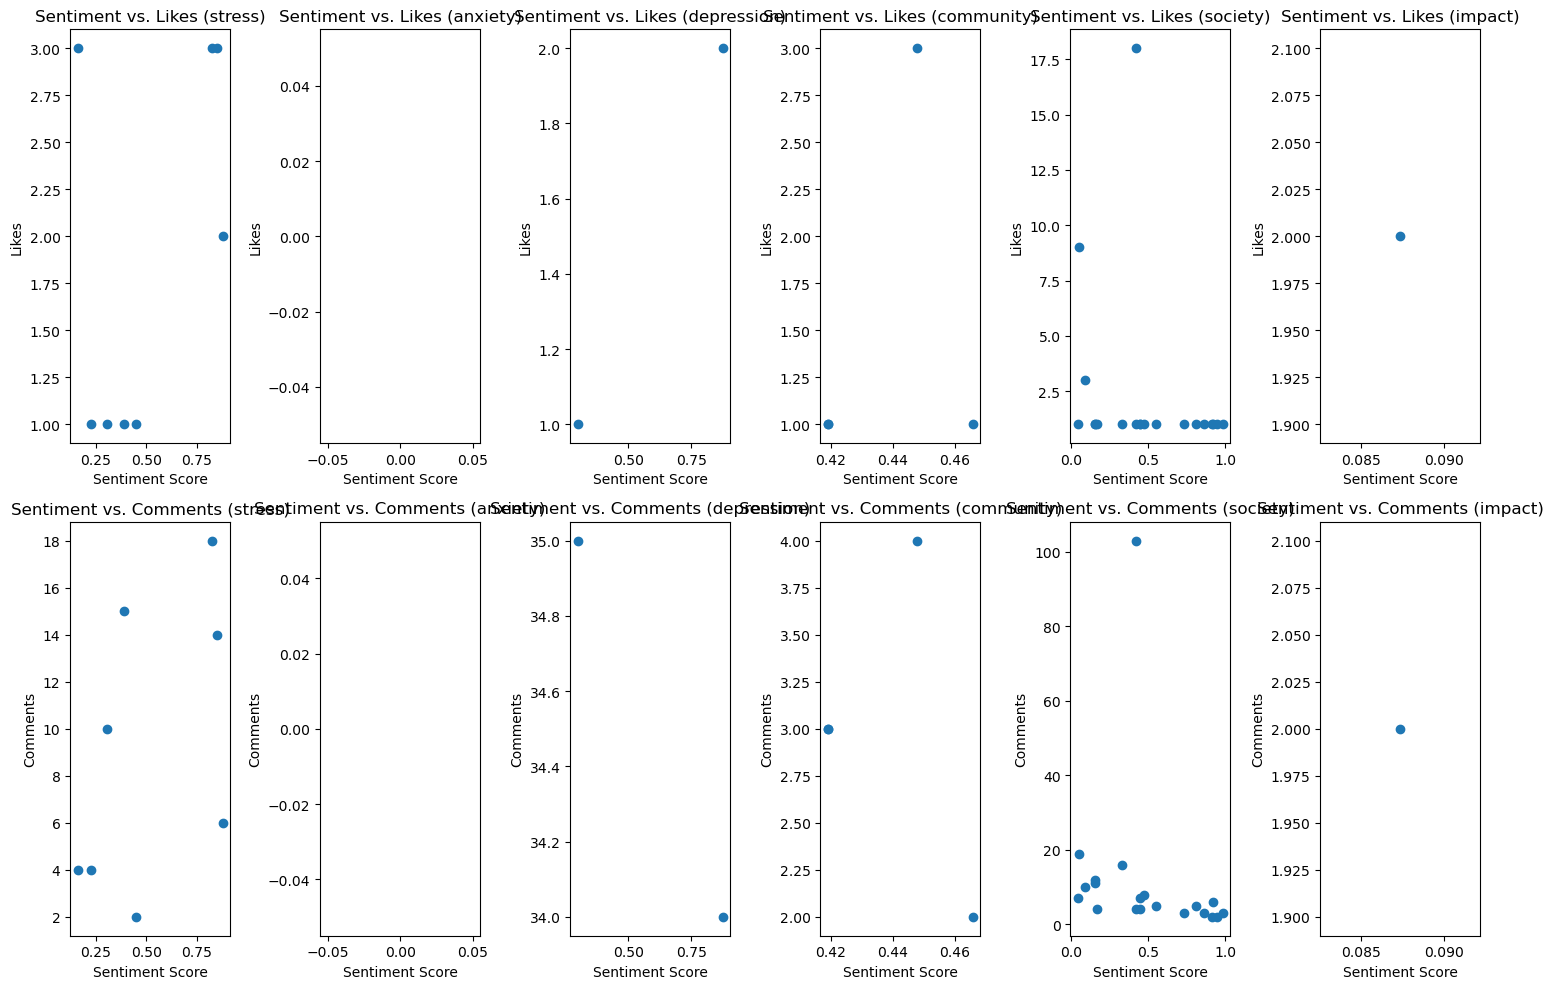

In [59]:
# Plot sentiment vs. likes and sentiment vs. comments for posts containing each keyword
fig, axs = plt.subplots(2, len(keywords), figsize=(15, 10))
for i, keyword in enumerate(keywords):
    axs[0, i].scatter(df[df[keyword]]['Sentiment'], df[df[keyword]]['Likes'])
    axs[0, i].set_title(f'Sentiment vs. Likes ({keyword})')
    axs[0, i].set_xlabel('Sentiment Score')
    axs[0, i].set_ylabel('Likes')
    axs[1, i].scatter(df[df[keyword]]['Sentiment'], df[df[keyword]]['Comments'])
    axs[1, i].set_title(f'Sentiment vs. Comments ({keyword})')
    axs[1, i].set_xlabel('Sentiment Score')
    axs[1, i].set_ylabel('Comments')
plt.tight_layout()
plt.show()

For most keywords, there doesn't appear to be a strong relationship between sentiment and likes or comments. The points are spread out across the range of sentiment scores and engagement levels.

For the keyword "depression", there are a few posts with high sentiment scores and a high number of comments. This suggests that posts related to depression that have a positive sentiment may elicit more engagement from the community.

For the keyword "impact", there are a few posts with low sentiment scores and a high number of likes. This suggests that posts related to impact that have a negative sentiment may also receive more likes.

<h3>TTR (Type-Token ratio)<h3>

In [61]:
df['TTR'] = df['Title'].apply(lambda x: len(set(jieba.lcut(str(x)))) / len(jieba.lcut(str(x))) if len(jieba.lcut(str(x))) > 0 else 0)

In [79]:
# df.head()

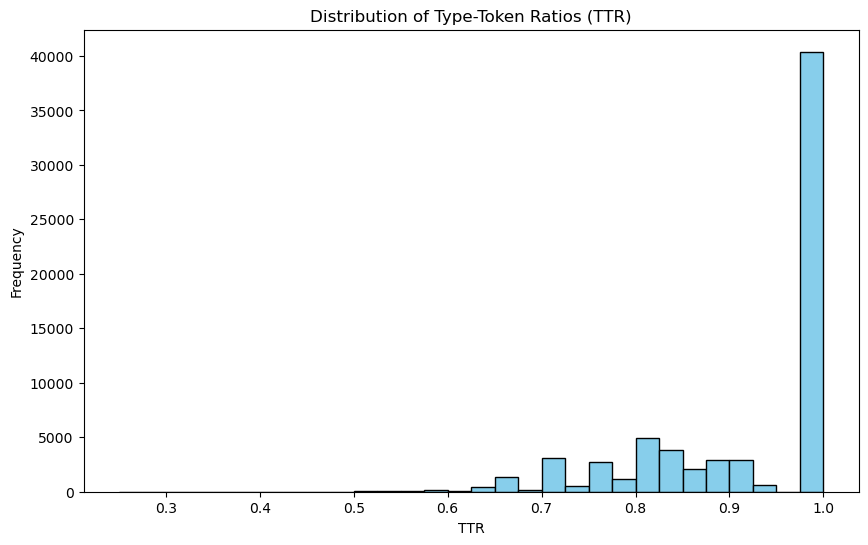

In [64]:
# Plot the distribution of TTR values
plt.figure(figsize=(10, 6))
plt.hist(df['TTR'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Type-Token Ratios (TTR)')
plt.xlabel('TTR')
plt.ylabel('Frequency')
plt.show()

 The TTR is a measure of lexical diversity, which can be interpreted as a measure of the richness of the vocabulary in the text. A higher TTR indicates a wider range of vocabulary.
 
 The x-axis represents the TTR, and the y-axis represents the frequency of posts with that TTR. As we can see, most of the posts have a TTR close to 1, indicating a high diversity of vocabulary. This suggests that users are expressing a wide range of ideas and topics in their posts.